In [3]:
import astropy.io
from astropy.io import fits
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import scipy.optimize as opt
from scipy.optimize import curve_fit
from itertools import islice


In [4]:
target1 = pd.read_csv('J074220.27+343213.3.csv')
#abflux = 3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * target1.Mag)+22.4328)
opflux = 10**(23-(target1.Mag +48.6)/2.5)
opflux_err = 10**(23-(target1.Mag + target1.Magerr +48.6)/2.5) - 10**(23-(target1.Mag +48.6)/2.5)
#opflux_err = (3631 * 3.6 * 10**(-10) * np.sinh(-0.92103 * (target1.Mag + target1.Magerr)+22.4328)) - (3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * target1.Mag)+22.4328))                

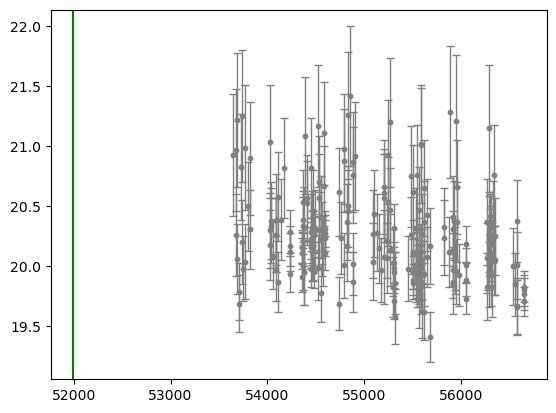

In [5]:
plt.scatter(target1.MJD,target1.Mag, s = 10, color = 'gray')
plt.errorbar(target1.MJD,target1.Mag, yerr = target1.Magerr, fmt = 'None', linewidth=1, capsize=3, color = 'gray')
plt.axvline(x= 51993 , color ='g')	
#plt.axvline(x= , color ='g')	

In [6]:
sorted_MJD =sorted(target1.MJD)
len(sorted_MJD)

221

In [7]:
diff = []
for i in range(0,len(sorted_MJD)-1):
    diff.append(sorted_MJD[i+1] -sorted_MJD[i])
diff

[24.90067000000272,
 0.009709999998449348,
 14.068370000000868,
 0.006580000001122244,
 17.000370000001567,
 5.9829699999972945,
 16.98793000000296,
 11.855179999998654,
 4.004909999996016,
 12.05970000000525,
 11.866609999997308,
 0.014020000002346933,
 32.00359000000026,
 21.894259999993665,
 0.023990000001504086,
 208.23862999999983,
 0.009210000003804453,
 0.009269999995012768,
 8.010630000004312,
 0.019659999998111743,
 24.966280000000552,
 24.954810000002908,
 0.010179999997490086,
 0.01202999999804888,
 9.922470000004978,
 13.073539999997593,
 6.842519999998331,
 23.912190000002738,
 36.0520600000018,
 55.969789999995555,
 0.0043700000023818575,
 0.00428000000101747,
 0.004349999995611142,
 123.32250000000204,
 0.005060000003140885,
 0.005019999996875413,
 0.004990000001271255,
 15.94079999999667,
 0.005190000003494788,
 0.005279999997583218,
 0.005150000004505273,
 11.988229999995383,
 0.009879999997792765,
 0.0196600000053877,
 9.96813000000111,
 16.95502999999735,
 0.03227999

In [8]:
sum = 0
seppt = []
for j in range (0,len(diff)):
    if diff[j] >100:
        sum += 1
        seppt.append(j)
print(sum)
seppt

8


[15, 33, 79, 96, 122, 165, 187, 210]

In [9]:
slice_length = []
slice_length.append(seppt[0]+1)

for i in range(0,len(seppt)-1):
    slice_length.append(seppt[i+1]-seppt[i])
slice_length.append(len(sorted_MJD)-seppt[-1])
slice_length

[16, 18, 46, 17, 26, 43, 22, 23, 11]

In [10]:
Input = iter(sorted_MJD)
grouped_MJD =  [list(islice(Input, elem)) for elem in slice_length] 

In [11]:
data = target1.sort_values('MJD')
target1.sort_values('MJD')

,InputID,ID,Mag,Magerr,RA,Decl,MJD,Blend
4,J074220.27+343213.3,1135035019714,20.93,0.51,115.58376,34.53695,53646.47416,0
5,J074220.27+343213.3,1135035019714,20.97,0.51,115.58429,34.53724,53671.37483,0
6,J074220.27+343213.3,1135035019714,20.26,0.34,115.58436,34.53677,53671.38454,0
1,J074220.27+343213.3,1135035019714,21.22,0.56,115.58406,34.53728,53685.45291,0
2,J074220.27+343213.3,1135035019714,20.06,0.29,115.58440,34.53695,53685.45949,0
...,...,...,...,...,...,...,...,...
163,J074220.27+343213.3,1135035019714,20.38,0.34,115.58423,34.53693,56579.50225,0
217,J074220.27+343213.3,2134089027101,19.83,0.13,115.58447,34.53713,56657.37501,0
218,J074220.27+343213.3,2134089027101,19.77,0.13,115.58452,34.53707,56657.38246,0
219,J074220.27+343213.3,2134089027101,19.80,0.13,115.58450,34.53711,56657.38990,0


In [12]:
df_1 = data.iloc[:seppt[0],:]
df_1.to_csv('Group1.csv', index=False)
#print(df_1)
grouped_MJD[0][-1]

53819.15302

In [13]:
df_2 = data.iloc[seppt[0]+1:seppt[1],:]
#print(df_2)
df_2.to_csv('Group2.csv', index=False)
grouped_MJD[1][-1]

54231.16929

In [14]:
df_3 = data.iloc[seppt[1]+1:seppt[2],:]
#print(df_3)
df_3.to_csv('Group3.csv', index=False)
grouped_MJD[2][-1]

54592.21136

In [15]:
df_4 = data.iloc[seppt[2]+1:seppt[3],:]
#print(df_4)
df_4.to_csv('Group4.csv', index=False)
grouped_MJD[3][-1]

54911.17252

In [16]:
df_5 = data.iloc[seppt[3]+1:seppt[4],:]
#print(df_5)
df_5.to_csv('Group5.csv', index=False)
grouped_MJD[4][-1]

55325.16219

In [17]:
df_6 = data.iloc[seppt[4]+1:seppt[5],:]
#print(df_6)
df_6.to_csv('Group6.csv', index=False)
grouped_MJD[5][-1]

55681.18028

In [18]:
df_7 = data.iloc[seppt[5]+1:seppt[6],:]
#print(df_7)
df_7.to_csv('Group7.csv', index=False)
grouped_MJD[6][-1]

56059.15537

In [19]:
df_8 = data.iloc[seppt[6]+1:seppt[7],:]
#print(df_8)
df_8.to_csv('Group8.csv', index=False)
grouped_MJD[7][-1]

56356.17912

In [21]:
df_9 = data.iloc[seppt[7]+1:,:]
#print(df_9)
df_9.to_csv('Group9.csv', index=False)
grouped_MJD[8][-1]

56657.39731

In [ ]:
df_10 = data.iloc[seppt[8]+1:seppt[9],:]
#print(df_10)
df_10.to_csv('Group10.csv', index=False)
grouped_MJD[9][-1]

In [ ]:
df_11 = data.iloc[seppt[9]+1:seppt[10],:]
#print(df_11)
df_11.to_csv('Group11.csv', index=False)
grouped_MJD[10][-1]

In [ ]:
df_12 = data.iloc[seppt[10]+1:,:]
#print(df_12)
df_12.to_csv('Group12.csv', index=False)
grouped_MJD[11][-1]

In [22]:
med = []
centerMJD = []
medMJD = []
medopflux = []

g1 = pd.read_csv('group1.csv')
med1 = np.median(g1.Mag)
centerMJD1 = np.mean(g1.MJD)
medMJD1 = np.median(g1.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g1.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)


g2 = pd.read_csv('group2.csv')
med1 = np.median(g2.Mag)
centerMJD1 = np.mean(g2.MJD)
medMJD1 = np.median(g2.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g2.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g3 = pd.read_csv('group3.csv')
med1 = np.median(g3.Mag)
centerMJD1 = np.mean(g3.MJD)
medMJD1 = np.median(g3.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g3.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g4 = pd.read_csv('group4.csv')
med1 = np.median(g4.Mag)
centerMJD1 = np.mean(g4.MJD)
medMJD1 = np.median(g4.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g4.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g5 = pd.read_csv('group5.csv')
med1 = np.median(g5.Mag)
centerMJD1 = np.mean(g5.MJD)
medMJD1 = np.median(g5.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g5.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g6 = pd.read_csv('group6.csv')
med1 = np.median(g6.Mag)
centerMJD1 = np.mean(g6.MJD)
medMJD1 = np.median(g6.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g6.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g7 = pd.read_csv('group7.csv')
med1 = np.median(g7.Mag)
centerMJD1 = np.mean(g7.MJD)
medMJD1 = np.median(g7.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g7.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g8 = pd.read_csv('group8.csv')
med1 = np.median(g8.Mag)
centerMJD1 = np.mean(g8.MJD)
medMJD1 = np.median(g8.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g8.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g9 = pd.read_csv('group9.csv')
med1 = np.median(g9.Mag)
centerMJD1 = np.mean(g9.MJD)
medMJD1 = np.median(g9.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g9.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)



In [ ]:
g10= pd.read_csv('group10.csv')
med1 = np.median(g10.Mag)
centerMJD1 = np.mean(g10.MJD)
medMJD1 = np.median(g10.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g10.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g11= pd.read_csv('group11.csv')
med1 = np.median(g11.Mag)
centerMJD1 = np.mean(g11.MJD)
medMJD1 = np.median(g11.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g11.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g12= pd.read_csv('group12.csv')
med1 = np.median(g12.Mag)
centerMJD1 = np.mean(g12.MJD)
medMJD1 = np.median(g12.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g12.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)


In [23]:
med

[20.31, 20.29, 20.27, 20.48, 20.15, 20.02, 20.12, 20.205, 19.814999999999998]

In [24]:
centerMJD

[53725.01459066666,
 54105.664614117646,
 54470.34656044446,
 54822.91441500001,
 55235.2988984,
 55566.08389666666,
 55941.21188857142,
 56305.80216772727,
 56604.944606]

In [25]:
medMJD


[53725.43076,
 54085.38372,
 54476.29741,
 54826.393095,
 55246.2207,
 55569.31917,
 55929.27596,
 56303.26741,
 56579.49862]

In [26]:
medopflux


[2.7289777828080403e-05,
 2.7797132677592828e-05,
 2.8313919957993673e-05,
 2.3338539696963263e-05,
 3.1622776601683795e-05,
 3.564511334262439e-05,
 3.250872973854347e-05,
 3.0063631895761607e-05,
 4.305676980932362e-05]

In [28]:
st = 53646
#start of observations

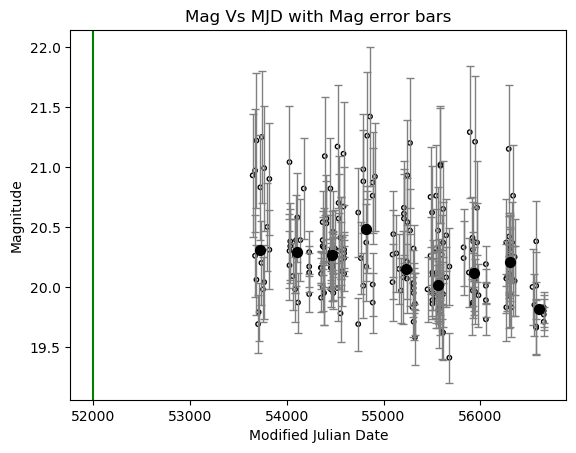

In [29]:
plt.scatter(target1.MJD,target1.Mag , s = 10, edgecolors = 'k', facecolors = 'none', zorder = 1)
plt.scatter(centerMJD,med, s =50, color = 'k', zorder =3 )
plt.errorbar(target1.MJD,target1.Mag, yerr = target1.Magerr, fmt = 'None', linewidth=1, capsize=3, color = 'gray', zorder=2)
plt.xlabel('Modified Julian Date')
plt.ylabel('Magnitude')
plt.title('Mag Vs MJD with Mag error bars')

plt.axvline(x= 51993 , color ='g')	
#plt.axvline(x=  , color ='g')	

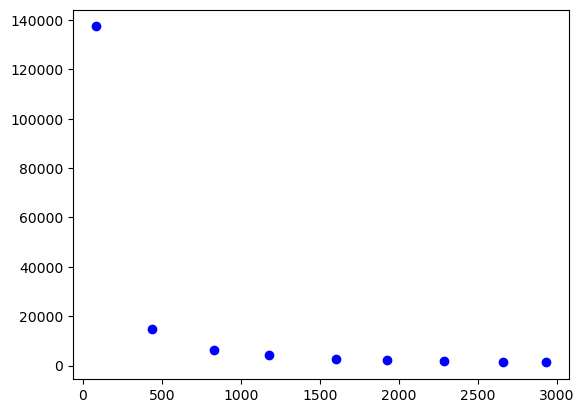

In [30]:
def f(x, a, b, c):
    return a * (x ** b) + c
x = np.array([item - st for item in medMJD])
y = f(x,4.05245427e+07,-1.3, 1.81095672e+01)
rng = np.random.default_rng()
y_noise = 0.001* rng.normal(size=x.size)
ydata = y + y_noise
plt.scatter(x, ydata, color = 'b')


In [31]:
popt3, pcov3 = curve_fit(f, x, med, maxfev =5000)


In [32]:
popt3

array([-1.24179062e-09,  2.45274896e+00,  2.03197769e+01])

In [33]:
pcov3

array([[ 4.59515320e-16,  4.62764662e-08, -1.38335711e-09],
       [ 4.62764662e-08,  4.66234198e+00, -1.37241490e-01],
       [-1.38335711e-09, -1.37241490e-01,  8.65826706e-03]])

In [34]:
 np.sqrt(np.diag(pcov3))

array([2.14363085e-08, 2.15924570e+00, 9.30498096e-02])

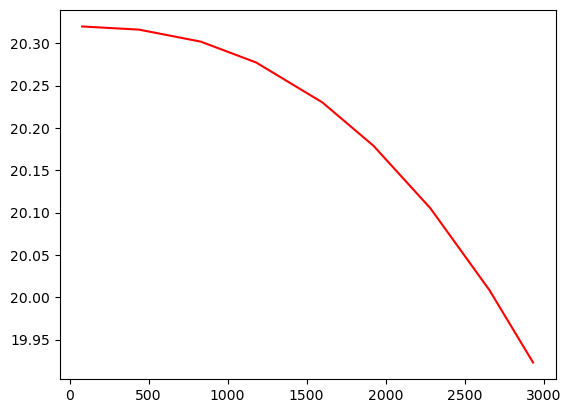

In [35]:
plt.plot(x, f(x,*popt3), 'r-')

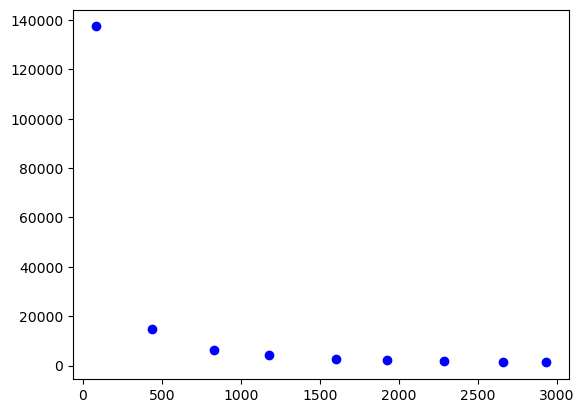

In [36]:
def g(x, a, b):
    return a * (x ** b) + 18
x = np.array([item - st	 for item in medMJD])
y = g(x,4.05245427e+07,-1.3)
rng = np.random.default_rng()
y_noise = 0.001* rng.normal(size=x.size)
ydata = y + y_noise
plt.scatter(x, ydata, color = 'b')


In [37]:
popt4, pcov4 = curve_fit(f, target1.MJD - st	, target1.Mag )

In [38]:
popt4

array([-4.36845277e-05,  1.13553984e+00,  2.04384398e+01])

In [39]:
pcov4

array([[ 6.69795713e-08,  1.87711810e-04, -2.08362660e-05],
       [ 1.87711810e-04,  5.26872704e-01, -5.72889752e-02],
       [-2.08362660e-05, -5.72889752e-02,  8.61911395e-03]])

In [40]:
 np.sqrt(np.diag(pcov4))

array([2.58804118e-04, 7.25859975e-01, 9.28391833e-02])

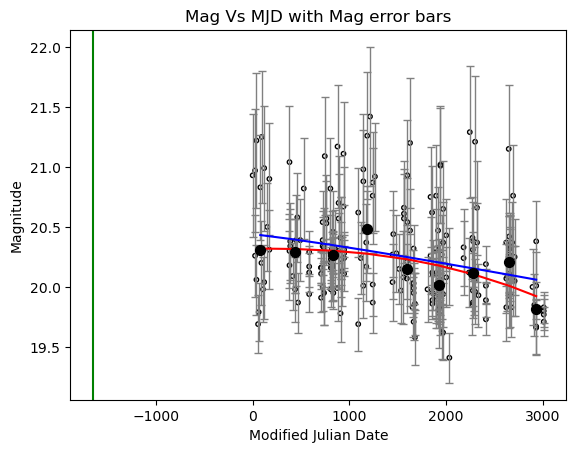

In [41]:
x = np.array([item - st for item in medMJD])
MJD = np.array([item - st for item in target1.MJD])
plt.scatter(MJD,target1.Mag , s = 10, edgecolors = 'k', facecolors = 'none', zorder = 1)
plt.scatter(x,med, s =50, color = 'k', zorder =4 )
plt.errorbar(MJD,target1.Mag, yerr = target1.Magerr, fmt = 'None', linewidth=1, capsize=3, color = 'gray', zorder=2)
plt.xlabel('Modified Julian Date')
plt.ylabel('Magnitude')
plt.title('Mag Vs MJD with Mag error bars')

plt.axvline(x= 51993  -st, color ='g')	
#plt.axvline(x= -st, color ='g')
plt.plot(x, f(x,*popt3), 'r-', zorder=3)
plt.plot(x, f(x,*popt4), 'b-', zorder=3)
#plt.plot(x, g(x, 0.66649567, -0.32796038), 'y-', zorder=3)
#plt.plot(x, g(x,-2.99993383e+00,  1.00423610e-02,  2.17984336e+01), 'g', zorder=3)



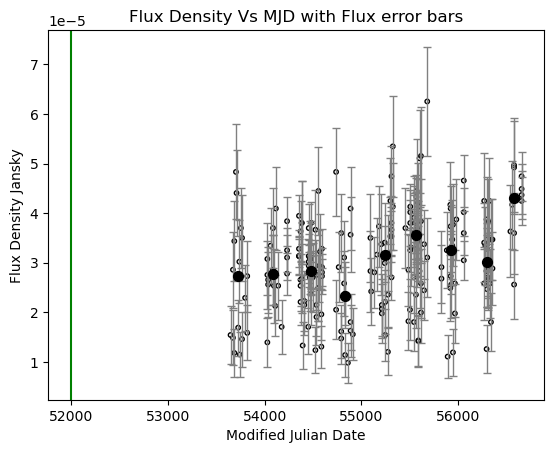

In [42]:
plt.scatter(target1.MJD ,opflux , s = 10, edgecolors = 'k', facecolors = 'none', zorder = 1)
#plt.scatter(target1.MJD ,abflux , s = 10, edgecolors = 'r', facecolors = 'none', zorder = 1)
plt.scatter(medMJD ,medopflux , s =50, color = 'k', zorder =3 )
plt.errorbar(target1.MJD,opflux, yerr = np.absolute(opflux_err), fmt = 'None', linewidth=1, capsize=3, color = 'gray', zorder=2)
plt.xlabel('Modified Julian Date')
plt.ylabel('Flux Density Jansky')
plt.title('Flux Density Vs MJD with Flux error bars')
#plt.ylim(0, 0.0004)

plt.axvline(x=  51993, color ='g')	
#plt.axvline(x= , color ='g')

In [43]:
popt2, pcov2 = curve_fit(f, x, medopflux, maxfev =5000)

In [44]:
popt2

array([7.04060221e-16, 2.95250593e+00, 2.73208985e-05])

In [45]:
pcov2

array([[ 1.88659374e-28, -3.35514226e-14, -2.24612114e-20],
       [-3.35514226e-14,  5.96861552e+00,  3.94224817e-06],
       [-2.24612114e-20,  3.94224817e-06,  6.15867975e-12]])

In [46]:
 np.sqrt(np.diag(pcov2))

array([1.37353330e-14, 2.44307501e+00, 2.48166874e-06])

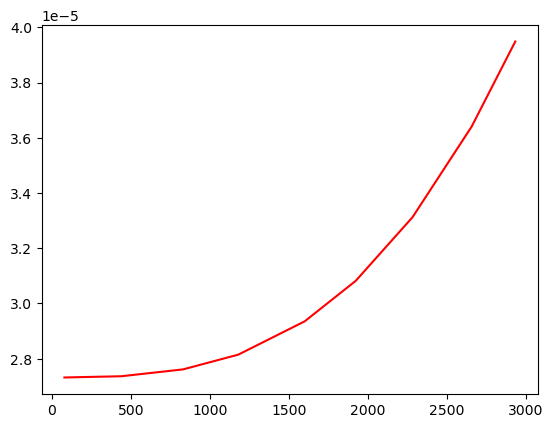

In [47]:
plt.plot(x, f(x,*popt2), 'r-')

In [48]:
popt1, pcov1 = curve_fit(f, target1.MJD - st, opflux, maxfev =5000)

In [49]:
popt1

array([4.35940942e-11, 1.54175902e+00, 2.64290336e-05])

In [50]:
pcov1

array([[ 9.06988023e-20, -2.58812280e-10, -4.43639997e-16],
       [-2.58812280e-10,  7.39245840e-01,  1.24466830e-06],
       [-4.43639997e-16,  1.24466830e-06,  3.17705333e-12]])

In [51]:
 np.sqrt(np.diag(pcov1))

array([3.01162419e-10, 8.59794068e-01, 1.78242905e-06])

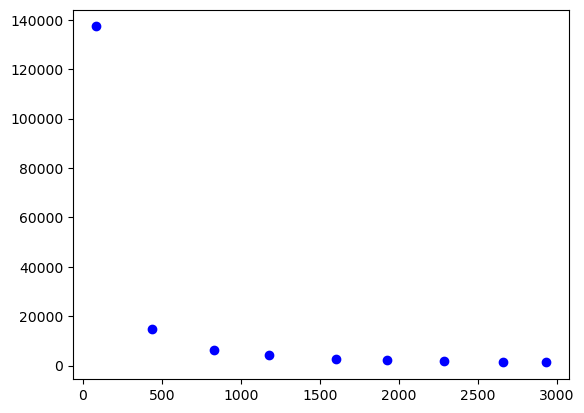

In [52]:
def h(x, a, b):
    return a * (x ** b) + 0.00015
x = np.array([item - st	 for item in medMJD])
y = h(x,4.05245427e+07,-1.3)
rng = np.random.default_rng()
y_noise = 0.001* rng.normal(size=x.size)
ydata = y + y_noise
plt.scatter(x, ydata, color = 'b')


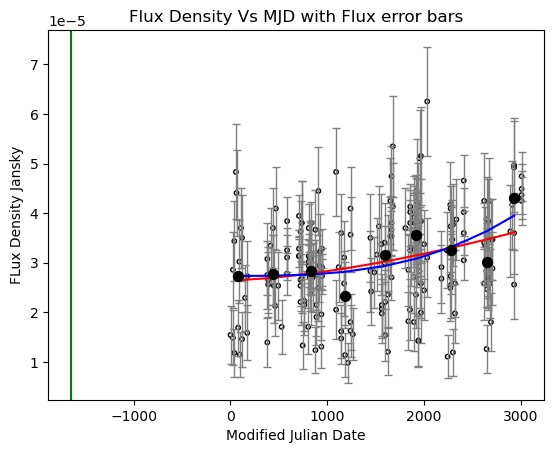

In [56]:
x = np.array([item - st for item in medMJD])
MJD = np.array([item - st for item in target1.MJD])
plt.scatter(MJD,opflux , s = 10, edgecolors = 'k', facecolors = 'none', zorder = 1)
plt.scatter(x,medopflux, s =50, color = 'k', zorder =4 )
plt.errorbar(MJD,opflux, yerr =np.absolute(opflux_err), fmt = 'None', linewidth=1, capsize=3, color = 'gray', zorder=2)
plt.xlabel('Modified Julian Date')
plt.ylabel('FLux Density Jansky')
plt.title('Flux Density Vs MJD with Flux error bars')
#plt.ylim(0, 0.0004)

plt.axvline(x=51993 -st, color ='g')	
#plt.axvline(x= -st, color ='g')
plt.plot(x, f(x, *popt1), 'r-', zorder=3)
plt.plot(x, f(x,*popt2), 'b-', zorder=3)
#plt.plot(x, h(x,-2.99993383e+00,  1.00423610e-02,  2.17984336e+01), 'b-', zorder=3)
#plt.plot(x, h(x,-2.99993383e+00,  1.00423610e-02,  2.17984336e+01), 'g-', zorder=3)


In [54]:
def mase(actual : np.ndarray, predicted : np.ndarray):

    forecast_error = np.mean(np.abs(actual - predicted))
    naive_forecast = np.mean(np.abs(np.diff(actual)))
    mase = forecast_error / naive_forecast

    return mase

In [55]:
actual = medopflux
predicted1 = func(x,)
predicted2 = func(x,)



NameError: name 'func' is not defined

In [ ]:
mase(actual,predicted1)

In [ ]:
mase(actual,predicted2)

In [ ]:
resid = opflux - func(x,)
chi2 = sum((resid / func(x,))**2)
chi2_red = chi2 / dof
